In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import svm


In [3]:
df = pd.read_csv('shakespeare.csv')

Connecting player line number with the name of the player and play. Lets see how all these are connected

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In the player column, replace every instance with the value "NaN" with "Other" 

In [7]:
df['Player'].replace(np.nan, 'Other',inplace = True)

In [8]:
df.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


Get an insight into the sum of null values present in our data

In [18]:
df.isnull().sum()

Dataline               0
Play                   0
PlayerLinenumber       3
ActSceneLine        6243
Player                 0
PlayerLine             0
dtype: int64

Drop all null values in the ActSceneLine column

In [23]:
df = df.dropna()

Now, no null values are present

In [25]:
df.isnull().sum()

Dataline            0
Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
dtype: int64

In an attempt to try and study the dataset we have, we try to find the count of unique values in each of the three columns, Play, Player and PlayerLine. Following that we also perform some feature engineering to look for additional values that our dataset might have. 

In [9]:
df['Player'].nunique()

935

In [10]:
df['Play'].nunique()

36

In [11]:
df['PlayerLine'].nunique()

107580

As an initial feature engineering strategy that I have in mind is to reduce my database to a select number of players based on the frequency of plays they particpated in and the frequency of Player lines each of the players was assigned. 

In [12]:
numberPlayers = df.groupby(['Player'])['Play'].nunique().sort_values(ascending= False).to_frame()

In [13]:
numberPlayers = numberPlayers.head(100)

In [14]:
numberPlayers.head()

,Play
Player,
Messenger,22
Servant,20
All,15
Captain,9
First Gentleman,8


In [15]:
numberPlayers['Player'] = numberPlayers.index.tolist()

In [16]:
numberPlayers.head()

,Play,Player
Player,,
Messenger,22,Messenger
Servant,20,Servant
All,15,All
Captain,9,Captain
First Gentleman,8,First Gentleman


Trying to plot the number of players in each play in the bar chart below

In [78]:
pd.DataFrame(df['Play'].unique().tolist(), columns=['Play Name']).head()

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well


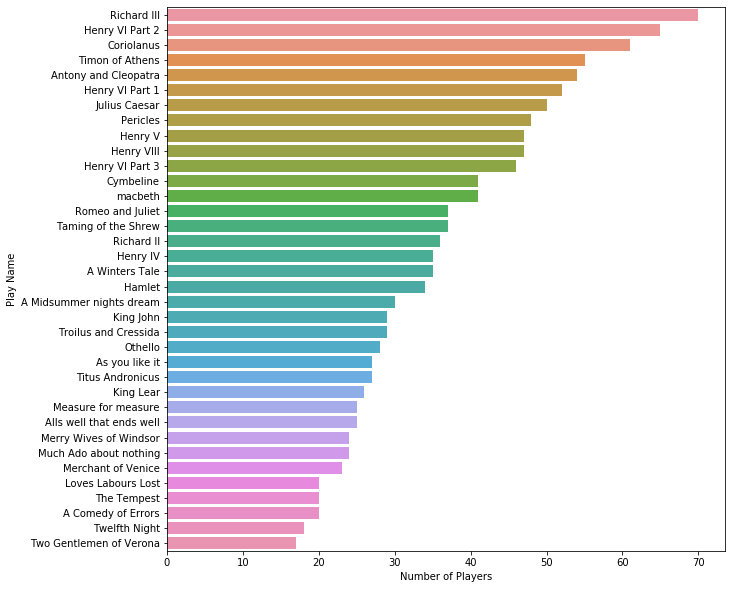

In [80]:
numberPlayers = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

Below we try to group plays as per the number of player lines in each of the given Plays

In [81]:
df.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine'].head()

Play
Hamlet                  4020
Coriolanus              3768
Cymbeline               3757
Richard III             3705
Antony and Cleopatra    3565
Name: PlayerLine, dtype: int64

In [82]:
play_data = df.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data.head()

,Lines,Play
0,4020,Hamlet
1,3768,Coriolanus
2,3757,Cymbeline
3,3705,Richard III
4,3565,Antony and Cleopatra


The figure below shows the number of lines in each play

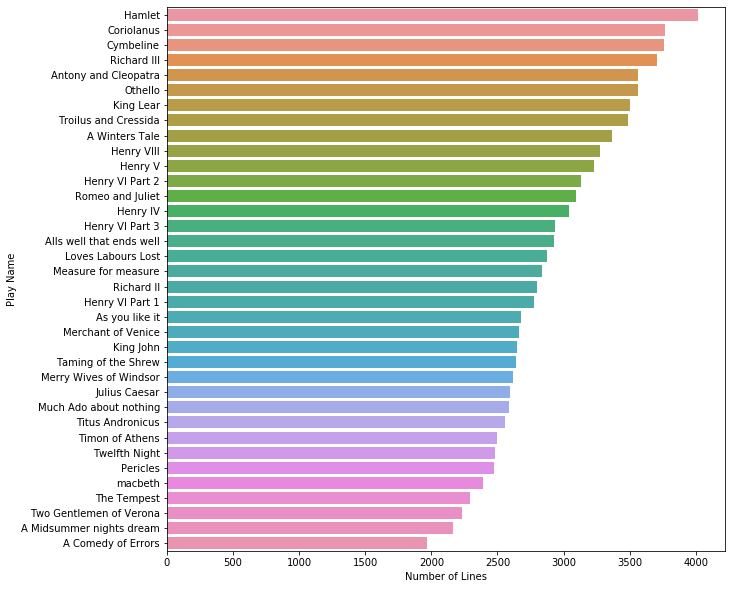

In [83]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

In [27]:
top10 = numberPlayers.head(10)

Plotting only the top 10 players when it comes to the number of plays in which they took part

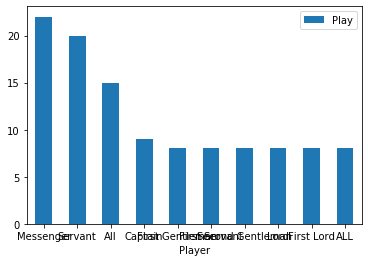

In [28]:
axx = top10.plot.bar(x='Player', y='Play', rot=0)

From the above plot we notice that there is some variation when it comes to the number of plays among the first few players and then this starts to dwindle and stabilize. In the plot below we try to look at the count of the number of plays. For example the first bar in blue shows that there are 6 players who have taken part in 8 plays each. We also notice that most often the count is 1 as each player's participation in plays is unique and inherent to the player's personal preferences, opportunities,...etc 

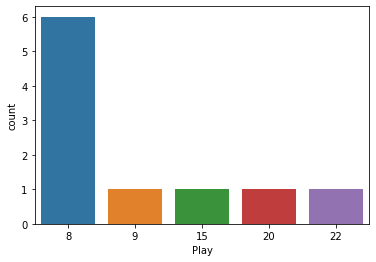

In [29]:
sns.countplot(top10['Play'])

Following that I perform the same sort of analysis but now I'm plotting the players versus the number total number of lines they have in the collective plays in which they took part. Apparently, the collective number of lines a player has does not directly correlate with the number of plays in which he took part. Like the player with the most player lines is not necessarily that with the highest number of plays.

In [30]:
numberLines = df.groupby(['Player'])['PlayerLine'].nunique().sort_values(ascending= False).to_frame()

In [31]:
numberLines.head()

,PlayerLine
Player,
GLOUCESTER,1794
HAMLET,1501
IAGO,1097
FALSTAFF,1053
KING HENRY V,1028


In [32]:
numberLines['Player'] = numberLines.index.tolist()

In [33]:
numberLines.head()

,PlayerLine,Player
Player,,
GLOUCESTER,1794,GLOUCESTER
HAMLET,1501,HAMLET
IAGO,1097,IAGO
FALSTAFF,1053,FALSTAFF
KING HENRY V,1028,KING HENRY V


In [35]:
top_10 = numberLines.head(10)

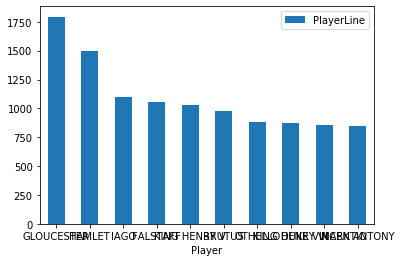

In [36]:
lplot = top_10.plot.bar(x='Player', y='PlayerLine', rot=0)

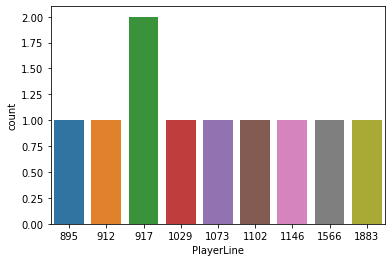

In [36]:
sns.countplot(top_10['PlayerLine'])

To encode the categorical data and that is the "Player" column we apply Label Encoding on the column and hence a unique value is given to each instance in the Player column.

In [38]:
label_encoder = preprocessing.LabelEncoder()

In [39]:
numberLines['Player']= label_encoder.fit_transform(numberLines['Player'])

In [40]:
numberLines.head()

,PlayerLine,Player
Player,,
GLOUCESTER,1794,361
HAMLET,1501,395
IAGO,1097,428
FALSTAFF,1053,267
KING HENRY V,1028,458


In [41]:
new = pd.concat([numberPlayers, numberLines], sort=False)

In [42]:
new = new.fillna(0)

In [43]:
new.head()

,Play,Player,PlayerLine
Player,,,
Messenger,22.0,Messenger,0.0
Servant,20.0,Servant,0.0
All,15.0,All,0.0
Captain,9.0,Captain,0.0
First Gentleman,8.0,First Gentleman,0.0


In [44]:
new.columns = ['Plays', 'Players', 'PlayerLines']

In [45]:
new.head()

,Plays,Players,PlayerLines
Player,,,
Messenger,22.0,Messenger,0.0
Servant,20.0,Servant,0.0
All,15.0,All,0.0
Captain,9.0,Captain,0.0
First Gentleman,8.0,First Gentleman,0.0


In [46]:
df = df.dropna()

In [47]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [48]:
df_1 = df.head(100)

In [49]:
df_1.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


Below we visualize a boxplot for the plays and number of player lines within a given play. Furthermore, we use label encoding to represent vlaues of each Play

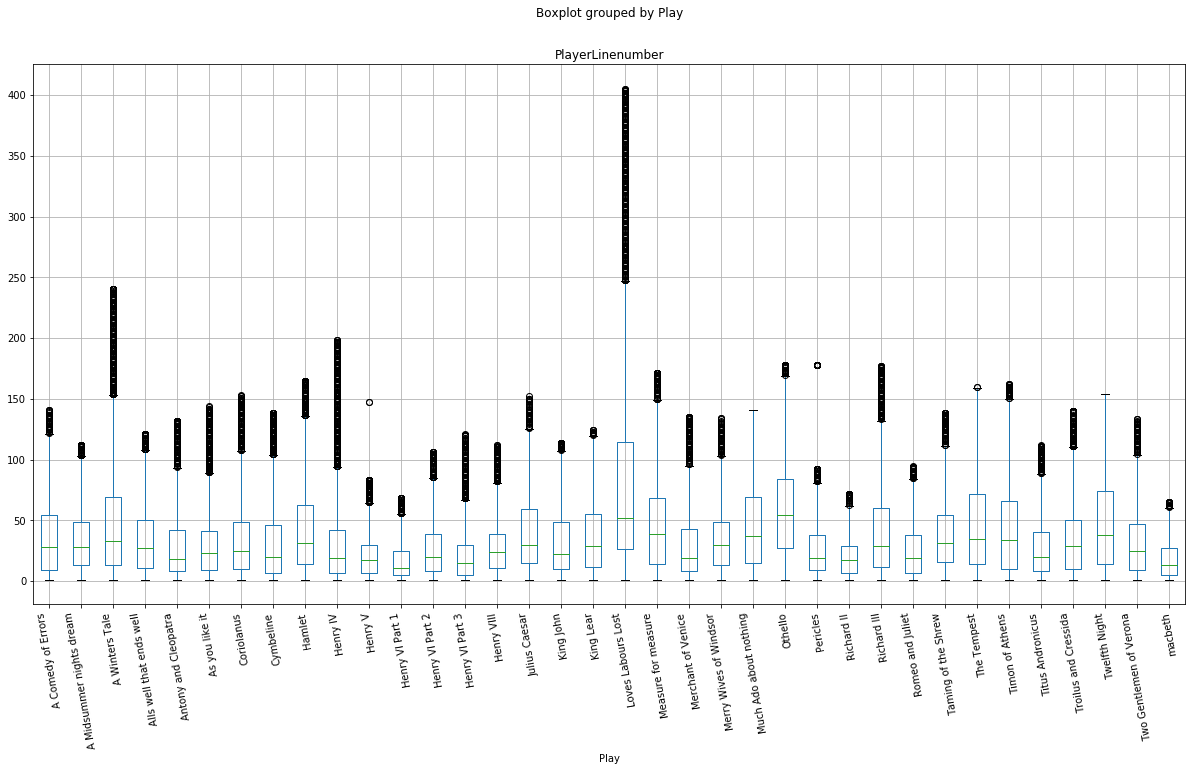

In [50]:
df.boxplot('PlayerLinenumber','Play',rot = 100,figsize=(20,10))

In [51]:
df.dtypes

Dataline              int64
Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               object
PlayerLine           object
dtype: object

Below we dismiss all other datatypes and choose to work only with the object data type

In [52]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Play,ActSceneLine,Player,PlayerLine
3,Henry IV,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


Remove column of ActSceneLine as it will not be used in the classification process

In [57]:
#finding Null values
obj_df[obj_df.isnull().any(axis=1)]

,Play,Player,PlayerLine


In [59]:
obj_df.head()

,Play,Player,PlayerLine
3,Henry IV,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,KING HENRY IV,No more the thirsty entrance of this soil


In [60]:
#removing Null values
obj_df = obj_df.dropna(subset=['Player'])
obj_df[obj_df.isnull().any(axis=1)]

,Play,Player,PlayerLine


In [61]:
obj_df.describe()

,Play,Player,PlayerLine
count,105153,105153,105153
unique,36,935,103716
top,Hamlet,GLOUCESTER,ANTIPHOLUS
freq,4020,1811,175


Changing Player to a category

In [62]:
obj_df = obj_df.drop(['PlayerLine'], axis = 1)

#changing "Player" to category
obj_df["Player"] = obj_df["Player"].astype('category')
obj_df.dtypes

Play        object
Player    category
dtype: object

In [63]:
obj_df["Player"] = obj_df["Player"].cat.codes
obj_df.head()

,Play,Player
3,Henry IV,457
4,Henry IV,457
5,Henry IV,457
6,Henry IV,457
7,Henry IV,457


We use label encoding for Play column leading to additional 36 columns corresponding to the 36 unique Play values

In [64]:
obj_df = pd.get_dummies(obj_df, columns=["Play"])

obj_df.head()

,Player,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,Play_Hamlet,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
obj_df.to_csv("processed_dataset.csv")

In [66]:
#Create training and test
X=obj_df.drop(columns=["Player"])
y=obj_df["Player"]
X.head()

,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,Play_Hamlet,Play_Henry IV,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y.head()

3    457
4    457
5    457
6    457
7    457
Name: Player, dtype: int16

Split the data into training and testing and using a decision tree classifier as below

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.22
Accuracy of Decision Tree classifier on test set: 0.22


Apparently this is low accuracy of 22% could be due to the way we shrinked the number of players in the dataset first by omitting some columns and then again when choosing the players based on number of player lines

Below we try to apply another classifier, the support vector machine to see if maybe the accuracy will improve

In [74]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2204724409448819


After applying SVM classifier we're getting same accuracy rate. To improve the accuracy we need to feature engineer our data in a different way or simply choose our feature set differently